## Assembly to order
### Stochastic model

In [12]:
# import library
import gurobipy as gp 
from gurobipy import GRB 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from model import gurobi_model_variables, get_data


### Load the data

In [14]:
df1, products_price, machine_daily_time, products, num_components, num_items, num_machines = get_data(path='../')

In [15]:
df1

,Wave Soldering Machine,Assembly Robot,Pick-and-Place Machine,Test Bench,Presses and Case Molding Machine,Laser or Plasma Cutting Machine,Burn-in Machine (Stress Testing),Packaging Machine,Computer_A,Computer_B,price
Central Processing Unit (CPU),0,6.0,2,3,0,0,6,0.02,1,1,150
Graphics Processing Unit (GPU) Intel,0,7.0,2,3,0,0,6,0.02,0,1,240
Graphics Processing Unit (GPU) NVIDIA,0,10.0,3,3,0,0,6,0.02,1,0,320
Motherboard,20,3.0,8,3,0,0,6,0.02,1,1,30
Random Access Memory (RAM) 16GB,0,2.0,2,3,0,0,6,0.02,0,1,30
Random Access Memory (RAM) 32GB,0,2.0,2,3,0,0,6,0.02,1,0,50
Storage Drive SSD 1TB,0,5.0,6,3,0,0,6,0.02,1,0,60
Storage Drive SSD 512GB,0,3.0,2,3,0,0,6,0.02,0,1,40
Storage Drive Hard Disk Drive,0,1.0,1,3,0,0,6,0.02,0,1,25
Battery,0,2.0,2,3,0,0,6,0.02,1,1,20


In [16]:
products_price, machine_daily_time

({'Computer_A': 1800, 'Computer_B': 1600},
 {'Wave Soldering Machine': 2880,
  'Assembly Robot': 2880,
  'Pick-and-Place Machine': 4320,
  'Test Bench': 3840,
  'Presses and Case Molding Machine': 960,
  'Laser or Plasma Cutting Machine': 2880,
  'Burn-in Machine (Stress Testing)': 7200,
  'Packaging Machine': 1440})

In [17]:
# Print the components for each product and their price

pri = df1.loc[:,products].map(lambda x: 'Yes' if x > 0 else '')
pri['price'] = df1['price']
pri

,Computer_A,Computer_B,price
Central Processing Unit (CPU),Yes,Yes,150
Graphics Processing Unit (GPU) Intel,,Yes,240
Graphics Processing Unit (GPU) NVIDIA,Yes,,320
Motherboard,Yes,Yes,30
Random Access Memory (RAM) 16GB,,Yes,30
Random Access Memory (RAM) 32GB,Yes,,50
Storage Drive SSD 1TB,Yes,,60
Storage Drive SSD 512GB,,Yes,40
Storage Drive Hard Disk Drive,,Yes,25
Battery,Yes,Yes,20


In [18]:
# Time to produce the first product for each machine

df1[df1[products[0]]==1].iloc[:,:num_machines].sum(axis=0)

Wave Soldering Machine               52.0
Assembly Robot                       52.9
Pick-and-Place Machine               74.0
Test Bench                           75.0
Presses and Case Molding Machine     20.0
Laser or Plasma Cutting Machine      75.0
Burn-in Machine (Stress Testing)    150.0
Packaging Machine                     0.5
dtype: float64

In [19]:
# Time to produce the second product for each machine

df1[df1[products[1]]==1].iloc[:,:num_machines].sum(axis=0)

Wave Soldering Machine               57.00
Assembly Robot                       46.40
Pick-and-Place Machine               65.00
Test Bench                           78.00
Presses and Case Molding Machine     20.00
Laser or Plasma Cutting Machine      70.00
Burn-in Machine (Stress Testing)    156.00
Packaging Machine                     0.52
dtype: float64

In [20]:
print(f"The total cost of the components for the first product is {sum(df1[products[0]]*df1['price'])} €")
print(f"The total cost of the components for the second product is {sum(df1[products[1]]*df1['price'])} €")

The total cost of the components for the first product is 925 €
The total cost of the components for the second product is 799 €


In [21]:
component_time = df1.iloc[:,:num_machines].sum(axis=1)
print(f"The total time for manifacturing the first product is {round(sum(df1[products[0]]*component_time),2)} minutes")
print(f"The total time for manifacturing for the second product is {round(sum(df1[products[1]]*component_time),2)} minutes")

The total time for manifacturing the first product is 499.4 minutes
The total time for manifacturing for the second product is 492.92 minutes


In [22]:
print(f'The selling price of the first product is {products_price[products[0]]} €')
print(f'The selling price of the second product is {products_price[products[1]]} €')

The selling price of the first product is 1800 €
The selling price of the second product is 1600 €


We have perform the Stability Analysis, and therefore we choose n_scenario = 5

In [23]:
# Generate the demand for each item in each scenario and the probability of each scenario
n_scenario = 5

np.random.seed(42)
demand =  np.random.normal(loc=100, scale=40, size=(n_scenario, num_items)).astype(int)
demand = np.clip(demand, 0, None) # Check no values are negative

prob = [1/n_scenario]*n_scenario 

### Generate the model

In [24]:
# Create the model

optimized_model, y, x = gurobi_model_variables(path='../', demand=demand, prob=prob)   

Restricted license - for non-production use only - expires 2026-11-23


### Analysis of the results

In [25]:
# Get the solution for each scenario

if optimized_model.status == GRB.OPTIMAL:
    print("Soluzione ottimale trovata!")
    for s in range(n_scenario):
        print(f'Scenario {s}')
        for j in range(num_items):
            print(f"Quantity for {products[j]}: {y[j, s].x}")
else:
    print("Nessuna soluzione ottimale trovata.")

Soluzione ottimale trovata!
Scenario 0
Quantity for Computer_A: 119.0
Quantity for Computer_B: 94.0
Scenario 1
Quantity for Computer_A: 119.0
Quantity for Computer_B: 121.0
Scenario 2
Quantity for Computer_A: 90.0
Quantity for Computer_B: 90.0
Scenario 3
Quantity for Computer_A: 119.0
Quantity for Computer_B: 121.0
Scenario 4
Quantity for Computer_A: 81.0
Quantity for Computer_B: 121.0


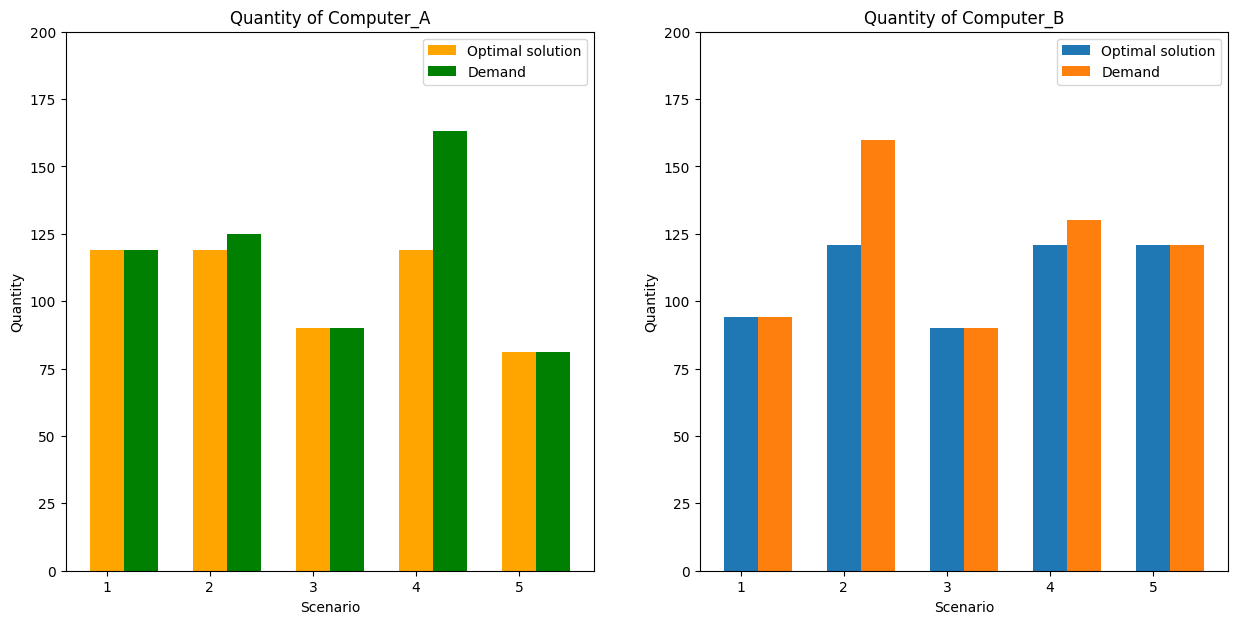

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))
width = 0.33
xx = np.arange(num_items)
ax[0].bar(np.arange(1,1+n_scenario), [y[0, s].x for s in range(n_scenario)], width, color='orange', label='Optimal solution')
ax[0].bar(width+np.arange(1,1+n_scenario), [demand[s][0] for s in range(n_scenario)], width, color='g', label='Demand')
ax[1].bar(np.arange(1,1+n_scenario), [y[1, s].x for s in range(n_scenario)], width, label='Optimal solution')
ax[1].bar(width+np.arange(1,1+n_scenario), [demand[s][1] for s in range(n_scenario)], width, label='Demand')
ax[0].set_title(f'Quantity of {products[0]}')
ax[1].set_title(f'Quantity of {products[1]}')
ax[0].set_xlabel('Scenario')
ax[1].set_xlabel('Scenario')
ax[0].set_ylabel('Quantity')
ax[1].set_ylabel('Quantity')
ax[0].set_ylim(0, 200)
ax[1].set_ylim(0, 200)
ax[0].legend()
ax[1].legend()
plt.show()

In [27]:
print(f'The total profit is {optimized_model.objVal} €')
print('It is composed by:') 
print(f' {round(sum([products_price[products[0]] * y[0,s].x * prob[s] for s in range(n_scenario)]),2)} € from the sells of {products[0]}')
print(f' {round(sum([products_price[products[1]] * y[1,s].x * prob[s] for s in range(n_scenario)]),2)} € from the sells of {products[1]}')
print(f' - {sum(df1.iloc[i,-1] * x[i].x for i in range(num_components))} € from the cost of the components')


The total profit is 158366.0 €
It is composed by:
 190080.0 € from the sells of Computer_A
 175040.0 € from the sells of Computer_B
 - 206754.0 € from the cost of the components
